随机生成1000个[0,100)的整数 用np中的方法进行排序

用np.sort和sorted(Python)两种方式进行运算时间的比较

In [2]:
import numpy as np
arr=np.random.randint(0,100,1000)
%timeit np.sort(arr)

6.64 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [3]:
arr=arr.tolist()
%timeit sorted(arr)

51.5 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
import torch
import torch.nn as nn

from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

import torch.nn.functional as F
import torch.optim as optim


In [8]:
torch.__version__

'2.0.0+cu117'

In [20]:
batch_size=64

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

train_dataset=datasets.MNIST(root='./data/mnist',train=True,download=False,transform=transform)

train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)



RuntimeError: Dataset not found. You can use download=True to download it

In [2]:
lis=[1,1,1,1,1,1,1]
len(lis)

7

In [ ]:
# tensor是个多维矩阵
# 总结来说，tensor是一个可以运行在GPU上的多维数组
# torch.tensor(data,dtype=None,device=None,requires_grad=False)
# requires_grad可以指定是否进行记录图的操作，默认为False

In [13]:
torch.tensor([1,2])

tensor([1, 2])

In [14]:
torch.tensor(1)

tensor(1)

In [15]:
# tensor转numpy
a=torch.ones(5)
print(a)
b=a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [16]:
# tensor转list
data=torch.zeros(3,3)
data=data.tolist()
print(data)

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


In [ ]:
# torch.nn.Liner
''' 
torch.nn.Linear(in_features, # 输入的神经元个数
           out_features, # 输出神经元个数
           bias=True # 是否包含偏置
           )
'''

In [123]:
from torch import nn
import torch

m=nn.Linear(2,1)  # 输入特征数为2，输出特征数为1

input=torch.Tensor([1,2])  # 给一个样本，该样本有2个特征，这两个特征的值分别为1和2
output=m(input)
output

tensor([1.1985], grad_fn=<AddBackward0>)

In [124]:
# 查看模型参数验证上述例子
for param in m.parameters():
    print(param)

Parameter containing:
tensor([[-0.1563,  0.4910]], requires_grad=True)
Parameter containing:
tensor([0.3727], requires_grad=True)


In [ ]:
# 模型中有三个参数，分别为两个权重和一个偏值

In [18]:
# 假设我们输入三个样本 其大小为3*5
X=torch.Tensor([
    [0.1,0.2,0.3,0.3,0.3],
    [0.4,0.5,0.6,0.6,0.6],
    [0.7,0.8,0.9,0.9,0.9],
])
X 

tensor([[0.1000, 0.2000, 0.3000, 0.3000, 0.3000],
        [0.4000, 0.5000, 0.6000, 0.6000, 0.6000],
        [0.7000, 0.8000, 0.9000, 0.9000, 0.9000]])

In [19]:
# 定义线性层
# 我们输入的特征数为5，想让下一层的神经元个数为10
m2=nn.Linear(in_features=5,out_features=10,bias=True)

In [20]:
for param in m2.parameters():
    print(param)

Parameter containing:
tensor([[-0.4132, -0.0210, -0.1204, -0.0470,  0.3019],
        [-0.1087,  0.0162,  0.0433, -0.2912,  0.3008],
        [-0.1735, -0.1869, -0.2238,  0.1913,  0.2916],
        [ 0.1309, -0.0066,  0.0278,  0.1519, -0.0918],
        [ 0.4403,  0.2079, -0.3633,  0.0050,  0.3786],
        [ 0.2148, -0.1525, -0.1202, -0.0773,  0.3428],
        [-0.2140, -0.0501,  0.2817,  0.2778, -0.0739],
        [-0.1606, -0.0895,  0.0098,  0.2869,  0.3874],
        [-0.0615,  0.2145,  0.0361,  0.0964, -0.2002],
        [-0.3156,  0.0874,  0.3541, -0.0858,  0.0520]], requires_grad=True)
Parameter containing:
tensor([-0.0205, -0.1331,  0.1694, -0.1553,  0.3787, -0.2657, -0.2845, -0.1029,
        -0.2130, -0.3031], requires_grad=True)


In [22]:
m2(X).size()

torch.Size([3, 10])

In [120]:
print(m2(X))

tensor([[-0.0257, -0.1249,  0.1924, -0.1171,  0.4704, -0.2311, -0.1702,  0.0684,
         -0.1966, -0.2211],
        [-0.1156, -0.1368,  0.1619, -0.0535,  0.6709, -0.1689, -0.1038,  0.1986,
         -0.1710, -0.1934],
        [-0.2056, -0.1487,  0.1315,  0.0102,  0.8715, -0.1066, -0.0373,  0.3288,
         -0.1453, -0.1658]], grad_fn=<AddmmBackward0>)


In [ ]:
# pytorch里面一切自定义操作基本上都是继承nn.Module类来实现的
'''
我们在定义自已的网络的时候，需要继承nn.Module类，
并重新实现构造函数__init__构造函数和forward这两个方法。但有一些注意技巧：
（1）一般把网络中具有可学习参数的层（如全连接层、卷积层等）放在构造函数__init__()中
（2）一般把不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)可放在构造函数中，
也可不放在构造函数中，如果不放在构造函数__init__里面，
则在forward方法里面可以使用nn.functional来代替
（3）forward方法是必须要重写的，它是实现模型的功能，
实现各个层之间的连接关系的核心。
'''

In [ ]:
# 简单的nn.Module的例子
# 将所有的层都放在构造函数__init__里面，但是只定义了一系列的层
# 各个层之间的连接关系并没有
# 在forward里面实现了所有层的连接关系

In [6]:
import torch

class myNet(torch.nn.Module):
    def __init__(self):
        super(myNet,self).__init__()  # 第一句话 首先调用父类的构造函数
        # 接下来实例化各个层
        self.conv1=torch.nn.Conv2d(3,32,3,1,1)
        self.relu1=torch.nn.ReLU()  # 线性整流层
        self.max_pooling1=torch.nn.MaxPool2d(2,1)  # 最大池化层 在一个卷积核中取一个最大的值，这里卷积核是(2,2)，步长为1

        self.conv2=torch.nn.Conv2d(3,32,3,1,1)
        self.relu2=torch.nn.ReLU()
        self.max_pooling2=torch.nn.MaxPool2d(2,1)

        self.dense1=torch.nn.Linear(32*3*3,128)  # 线性回归
        self.dense2=torch.nn.Linear(128,10)

    def forward(self,x):
        x=self.conv1(x)
        x=self.relu1(x)
        x=self.max_pooling1(x)
        x=self.conv2(x)
        x=self.relu2(x)
        x=self.max_pooling2(x)
        x=self.dense1(x)
        x=self.dense2(x)
        return x
    
module=myNet()
print(module)

myNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pooling1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pooling2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dense1): Linear(in_features=288, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# 另外一种写法 运行关系在forward里面通过functional的方法实现
# 将没有训练参数的层放到forward方法里

In [24]:
import torch
import torch.nn.functional as F

class myNet2(torch.nn.Module):
    def __init__(self):
        super(myNet2,self).__init__()
        self.conv1=torch.nn.Conv2d(3,32,3,1,1)
        self.conv2=torch.nn.Conv2d(3,32,3,1,1)

        self.dense1=torch.nn.Linear(32*3*3,128)
        self.dense2=torch.nn.Linear(128,10)

    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=F.max_pool2d(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x)
        x=self.dense1(x)
        x=self.dense2(x)

model=myNet2()
print(model)

myNet2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dense1): Linear(in_features=288, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=10, bias=True)
)


In [31]:
# 使用Sequential来包装
class myNet3(nn.Module):
    def __init__(self):
        super(myNet3,self).__init__()
        self.conv_block=nn.Sequential(
            nn.Conv2d(3,32,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.dense_block=nn.Sequential(
            nn.Linear(32*3*3,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )

    # 在这里实现所谓的向前传播
    def forward(self,x):
        conv_out=self.conv_block(x)
        res=conv_out.view(conv_out.size(0),-1)  # 将多维数据平铺为一维
        out=self.dense_block(res)
        return res
    
model=myNet3()
print(model)

myNet3(
  (conv_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense_block): Sequential(
    (0): Linear(in_features=288, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


Module类的常见使用方法

In [33]:
# 1 model.children()
for i in model.children():
    print(i)
    print(type(i))
    print('---------------------------------------')

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
<class 'torch.nn.modules.container.Sequential'>
---------------------------------------
Sequential(
  (0): Linear(in_features=288, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)
<class 'torch.nn.modules.container.Sequential'>
---------------------------------------


In [34]:
# 2 model.named_children()
for i in model.named_children():
    print(i)
    print(type(i))
    print('--------------------------------------')

('conv_block', Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
))
<class 'tuple'>
--------------------------------------
('dense_block', Sequential(
  (0): Linear(in_features=288, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
))
<class 'tuple'>
--------------------------------------


总结：所有放在__init__()构造函数里的层都是这个模型的固有属性

In [30]:
# 在pytorch中的view()函数就是用来改变tensor的形状的
# 例如将2行3列的tensor变为1行6列，其中-1表示会自适应的调整剩余的维度

a=torch.Tensor(2,3)
print(a)
print(a.view(1,-1))

tensor([[1.6689e+22, 1.6149e-07, 2.0546e+20],
        [1.0920e-05, 5.1210e-11, 7.1450e+31]])
tensor([[1.6689e+22, 1.6149e-07, 2.0546e+20, 1.0920e-05, 5.1210e-11, 7.1450e+31]])


In [2]:
# 线性整流函数
import torch.nn as nn
import torch

a=torch.randn(10)
rule=nn.ReLU()
b=rule(a)
print(a)
print(b)

tensor([-0.0449,  1.4065,  1.8616, -0.9801, -0.8620, -0.1870,  1.7854, -0.0398,
        -0.3440,  0.0294])
tensor([0.0000, 1.4065, 1.8616, 0.0000, 0.0000, 0.0000, 1.7854, 0.0000, 0.0000,
        0.0294])


In [25]:
# Sequential可以作为一个容器包装各层
# 以下是Sequential的简单定义
''' 
class Sequential(Module): # 继承Module
    def __init__(self, *args):  # 重写了构造函数
    def _get_item_by_idx(self, iterator, idx):
    def __getitem__(self, idx):
    def __setitem__(self, idx, module):
    def __delitem__(self, idx):
    def __len__(self):
    def __dir__(self):
    def forward(self, input):  # 重写关键方法forward
'''

' \nclass Sequential(Module): # 继承Module\n    def __init__(self, *args):  # 重写了构造函数\n    def _get_item_by_idx(self, iterator, idx):\n    def __getitem__(self, idx):\n    def __setitem__(self, idx, module):\n    def __delitem__(self, idx):\n    def __len__(self):\n    def __dir__(self):\n    def forward(self, input):  # 重写关键方法forward\n'

Sequential类不同的实现(3种实现)

In [26]:
# 最简单的序贯模型
import torch.nn as nn
model=nn.Sequential(nn.Conv2d(1,20,5),nn.ReLU(),nn.Conv2d(20,64,5),nn.ReLU())

print(model)
print(model[2])  # 通过索引获取第几个层

# 这样做每一层是没有名称的，默认以0、1、2、3来命名

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)
Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))


In [27]:
# 第二种实现方式——每一层有名称
import torch.nn as nn 
from collections import OrderedDict
model=nn.Sequential(OrderedDict([
    ('conv1',nn.Conv2d(1,20,5)),
    ('relu',nn.ReLU()),
    ('conv2',nn.Conv2d(20,64,5)),
    ('relu2',nn.ReLU())
]))
print(model)
print(model[2])

# 每一层都有了名字，但要注意并不能通过名字获得某层，依旧要用索引获取。

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)
Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))


In [28]:
# Sequential的第三种实现
import torch.nn as nn
from collections import OrderedDict
model = nn.Sequential()
model.add_module("conv1",nn.Conv2d(1,20,5))
model.add_module('relu1', nn.ReLU())
model.add_module('conv2', nn.Conv2d(20,64,5))
model.add_module('relu2', nn.ReLU())
 
print(model)
print(model[2]) 

# add_module()方法实际上定义在它的父类Module里面的，Sequential继承了而已

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)
Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))


In [50]:
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt 
import torch.nn as nn 
import cv2 

# 将图片转化为模型可用的数据
# 用cv2来读取图片，并转成深度学习可使用的数据格式

def getImageData(imgFile):
    image=cv2.imread(imgFile,0)
    image=F.to_tensor(image)  # shape为[1,x,x] [通道，高，宽]
    image=image.unsqueeze(0)  # shape为[1,1,x,x] [数量，通道，高，宽]
    return image

In [69]:
# 图片显示 将三个图片放到plt上
def showTensorImg(image,title=""):
    plt.figure(title)
    plt.sca(plt.subplot(1,3,1))
    plt.imshow(image[0].data,cmap=plt.cm.gray)
    plt.sca(plt.subplot(1,3,2))
    plt.imshow(image[1].data,cmap=plt.cm.gray)
    # plt.sca(plt.subplot(1,3,3))
    # plt.imshow(image[2].data,cmap=plt.cm.gray)


In [95]:
# 定义一个神经网络
# 用一个神经网络 在其中加入卷积层

# 定义模型
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        self.conv=nn.Conv2d(in_channels=1,out_channels=2,kernel_size=(3,3),stride=1,padding=1)
        self.relu=nn.ReLU(inplace=True)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=1)

    # 把模型里的卷积层和激活层后的效果显示出来看一看
    def forward(self,image):
        img=self.conv(image)
        print("conv:",img,img.shape,"\n")
        showTensorImg(img.squeeze(),"conv")
        # torch.unsqueeze()函数的作用减少数组A指定位置N的维度，
        # 如果不指定位置参数N，如果数组A的维度为（1，1，3）
        # 那么执行 torch.squeeze(A，1) 后A的维度变为 （1，3），
        # 中间的维度被删除
        # showTensorImg(img,"relu")

        img=self.relu(img)
        print("relu:",img,img.shape,"\n")
        showTensorImg(img.squeeze(),"relu")

        img=self.pool(img)
        print("pool:",img,img.shape,"\n")
        showTensorImg(img.squeeze(),"pool")

        return img

(677, 408)
conv: tensor([[[[-0.2585, -0.2287, -0.2287,  ..., -0.2137, -0.2137, -0.1121],
          [-0.0065, -0.0569, -0.0569,  ..., -0.0482, -0.0482,  0.1119],
          [-0.0065, -0.0569, -0.0569,  ..., -0.0482, -0.0482,  0.1119],
          ...,
          [-0.0065, -0.0569, -0.0569,  ..., -0.0482, -0.0482,  0.1119],
          [-0.0065, -0.0569, -0.0569,  ..., -0.0482, -0.0482,  0.1119],
          [ 0.0863,  0.1148,  0.1148,  ...,  0.1172,  0.1172,  0.3110]],

         [[-0.0598, -0.1061, -0.1061,  ..., -0.0954, -0.0954,  0.1196],
          [-0.3036, -0.2175, -0.2175,  ..., -0.2027, -0.2027,  0.1835],
          [-0.3036, -0.2175, -0.2175,  ..., -0.2027, -0.2027,  0.1835],
          ...,
          [-0.3036, -0.2175, -0.2175,  ..., -0.2027, -0.2027,  0.1835],
          [-0.3036, -0.2175, -0.2175,  ..., -0.2027, -0.2027,  0.1835],
          [-0.0036,  0.2799,  0.2799,  ...,  0.2766,  0.2766,  0.3996]]]],
       grad_fn=<ConvolutionBackward0>) torch.Size([1, 2, 677, 408]) 

relu: tensor([

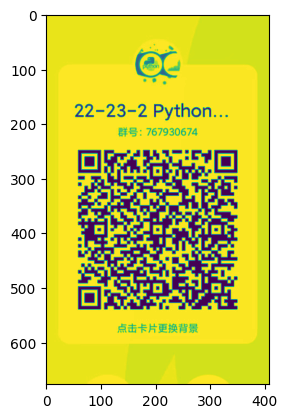

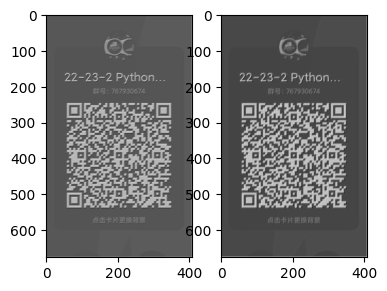

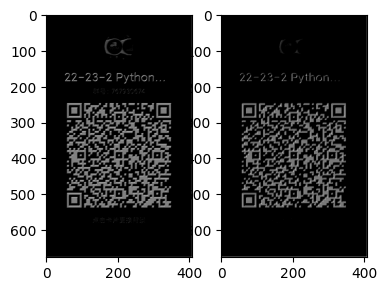

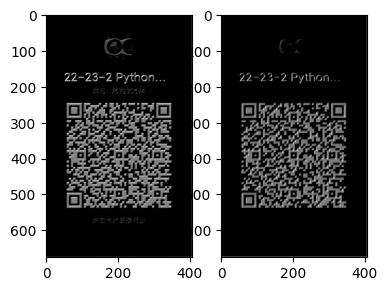

In [96]:
if __name__=="__main__":
    img=cv2.imread("../img/qq.jpg",0)
    plt.imshow(img)
    print(img.shape)

    net=MyModel()
    image=getImageData("../img/qq.jpg")
    #print(image.shape)
    #print(image[1].data)
    res=net(image)
    
    plt.show()

In [75]:
a=torch.randn(1,1,3)
print(a)
print(a.shape)

tensor([[[ 1.1580, -0.0453, -1.0651]]])
torch.Size([1, 1, 3])


In [77]:
a=torch.randn([1,2])
print(a)
print(a.shape)

tensor([[ 0.3367, -0.2066]])
torch.Size([1, 2])


In [78]:
a=torch.randn([1,2,3])
print(a)
print(a.shape)

tensor([[[ 0.8025,  0.3554, -0.9383],
         [ 1.0709,  0.0731,  1.3805]]])
torch.Size([1, 2, 3])


In [80]:
b=a.squeeze()
print(b)

tensor([[ 0.8025,  0.3554, -0.9383],
        [ 1.0709,  0.0731,  1.3805]])


In [81]:
b=b.squeeze()
print(b)

tensor([[ 0.8025,  0.3554, -0.9383],
        [ 1.0709,  0.0731,  1.3805]])


In [82]:
b=torch.squeeze(a)
print(b)

tensor([[ 0.8025,  0.3554, -0.9383],
        [ 1.0709,  0.0731,  1.3805]])


In [83]:
b=torch.squeeze(a,0)
print(b)

tensor([[ 0.8025,  0.3554, -0.9383],
        [ 1.0709,  0.0731,  1.3805]])


In [85]:
b=torch.squeeze(a,1)
print(b)

tensor([[[ 0.8025,  0.3554, -0.9383],
         [ 1.0709,  0.0731,  1.3805]]])


In [89]:
b=torch.squeeze(a,2)
print(b)

tensor([[[ 0.8025,  0.3554, -0.9383],
         [ 1.0709,  0.0731,  1.3805]]])


In [90]:
b=torch.unsqueeze(a,0)
print(b)

tensor([[[[ 0.8025,  0.3554, -0.9383],
          [ 1.0709,  0.0731,  1.3805]]]])


In [91]:
b=torch.unsqueeze(a,1)
print(b)

tensor([[[[ 0.8025,  0.3554, -0.9383],
          [ 1.0709,  0.0731,  1.3805]]]])


In [92]:
b=torch.unsqueeze(a,2)
print(b)

tensor([[[[ 0.8025,  0.3554, -0.9383]],

         [[ 1.0709,  0.0731,  1.3805]]]])


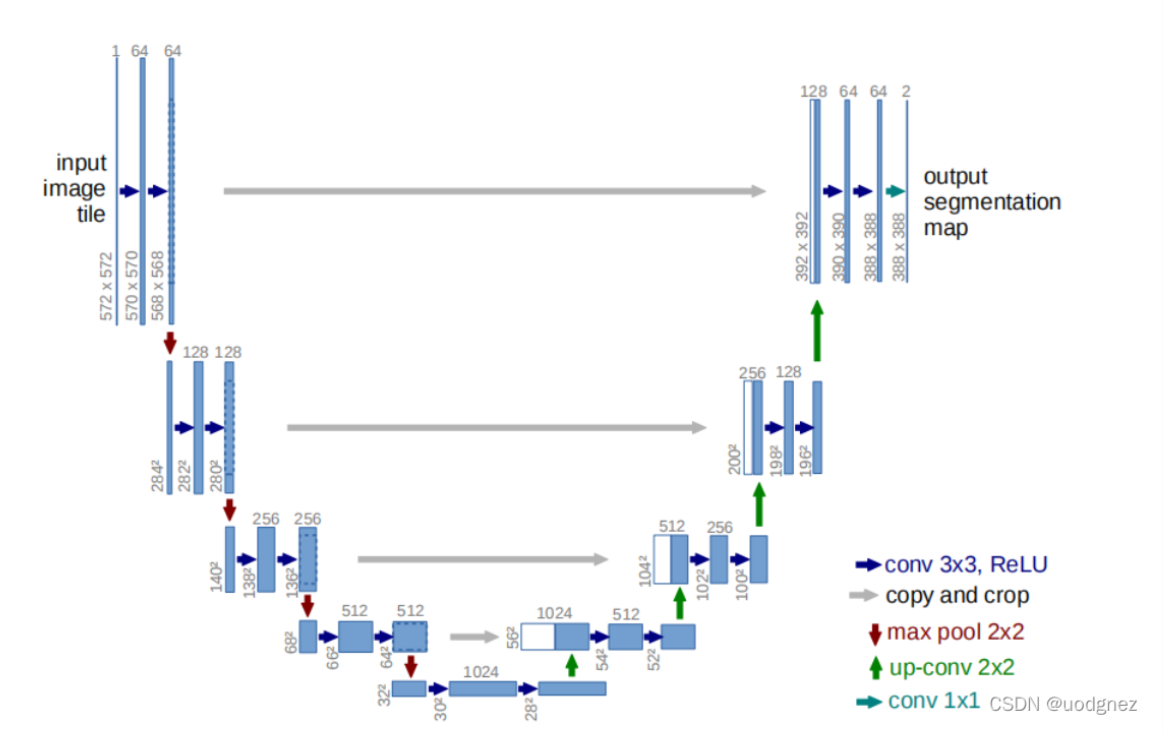

In [2]:
# U-Net 卷积神经网络
import torch
import torch.nn as nn
import torch.nn.functional as F

# 双层卷积模型
class DoubleConv3d(nn.Module):
    def __init__(self,input,output):
        super(DoubleConv3d,self).__init__()
        self.conv=nn.Sequential(
            nn.Conv3d(input,output,kernel_size=3,padding=1),
            nn.BatchNorm3d(output),
            nn.ReLU(True),
            nn.Conv3d(output,output,kernel_size=3,padding=1),
            nn.BatchNorm3d(output),
            nn.ReLU(True)
        )

    def forward(self,x):
        out=self.conv(x)
        return out

In [108]:
# 下采样
class DownSampling(nn.Module):
    def __init__(self):
        super(DownSampling,self).__init__()
        self.down=nn.MaxPool3d(kernel_size=2)  # 最大池化

    def forward(self,x):
        out=self.down(x)
        return out

In [109]:
''' 
转置卷积
首先我们在特征图中间插值0
每两个元素之间插stride-1个0值
然后真实的padding与输入的会有所区别
真正做的padding为kernel-padding-1
真实的卷积核kernel与输入参数一致
真实的stride不管输入参数是什么永远为1

'''

# 上采样
class UpSampling(nn.Module):
    def __init__(self,input,output):
        super(UpSampling,self).__init__()
        self.up=nn.Sequential(
            nn.ConvTranspose3d(input,output,kernel_size=2,stride=2),  # 转置卷积
            nn.BatchNorm2d(output)
        )

    def forward(self,x,y):
        x=self.up(x)
        diffY=y.size()[2]-x.size()[2]
        diffX=y.size()[3]-x.size()[3]
        x=F.pad(x,[diffX//2,diffX-diffX//2,
                   diffY//2,diffY-diffY//2])  # 将x图的长宽变得和y图的长宽一样
        out=torch.cat([y,x],dim=1)  # 将x图和y图相加
        return out 


In [113]:
class Unet(nn.Module):
    def __init__(self):
        super(Unet,self).__init__()
        self.layer1=DoubleConv2d(1,64)
        self.layer2=DoubleConv2d(64,128)
        self.layer3=DoubleConv2d(128,256)
        self.layer4=DoubleConv2d(256,512)
        self.layer5=DoubleConv2d(512,1024)
        self.layer6=DoubleConv2d(1024,512)
        self.layer7=DoubleConv2d(512,256)
        self.layer8=DoubleConv2d(256,128)
        self.layer9=DoubleConv2d(128,64)

        self.layer10=nn.Conv2d(64,2,kernel_size=3,padding=1)

        self.down=DownSampling()
        self.up1=UpSampling(1024,512)
        self.up2=UpSampling(512,256)
        self.up3=UpSampling(256,128)
        self.up4=UpSampling(128,64)

    def forward(self,x):
        conv1=self.layer1(x)
        down1=self.down(conv1)
        conv2=self.layer2(down1)
        down2=self.down(conv2)
        conv3=self.layer3(down2)
        down3 = self.down(conv3)
        conv4 = self.layer4(down3)
        down4 = self.down(conv4)
        conv5 = self.layer5(down4)
        up1=self.up1(conv5,conv4)
        conv6=self.layer6(up1)
        up2=self.up2(conv6,conv3)
        conv7=self.layer7(up2)
        up3=self.up3(conv7,conv2)
        conv8 = self.layer8(up3)
        up4 = self.up4(conv8, conv1)
        conv9 = self.layer9(up4)
        out=self.layer10(conv9)
        return out


In [118]:
if __name__=="__main__":
    myNet=Unet()
    # device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # myNet.to(device)
    input=torch.rand(3,1,572,572)
    # output=myNet(input.to(device))
    output=myNet(input)
    print(output.shape)

torch.Size([3, 2, 572, 572])


In [116]:
torch.cuda.empty_cache()

In [111]:
t4d=torch.empty(3,5,3)
print(t4d)

tensor([[[0.0000e+00, 3.4108e-36, 2.7340e+20],
         [6.8589e+22, 1.5766e-19, 1.2185e+22],
         [7.2131e+22, 4.3222e+27, 3.1088e-18],
         [2.1708e-18, 1.9210e+31, 6.5950e+22],
         [6.1948e-04, 1.0374e-08, 2.9907e+21]],

        [[7.5343e+28, 7.7128e+31, 3.3129e-18],
         [1.0776e-08, 2.1707e-18, 2.8177e+20],
         [2.8175e+20, 8.3195e+35, 2.9710e+32],
         [7.2156e+22, 7.9304e+34, 1.7539e+19],
         [7.0974e+22, 7.0072e+22, 1.0902e+27]],

        [[4.5100e+16, 7.7052e+31, 3.3129e-18],
         [1.0776e-08, 2.1707e-18, 3.0958e-18],
         [1.0776e-08, 2.1707e-18, 7.8720e+31],
         [2.1715e-18, 4.4160e+21, 7.7135e+31],
         [1.7667e+22, 1.4580e-19, 3.0881e+29]]])


In [105]:
p3d=(1,2,3,4,5,6)  # (左边填充数, 右边填充数)
t1=F.pad(t4d,p3d,'constant',3)
print(t1)

TypeError: Got inappropriate fill arg